<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [FAT0413156](https://gmxavier.github.io/FAT0413156)
by Gilberto Xavier (gmxavier at fat.uerj.br); the content is available [on Github](https://github.com/gmxavier/FAT0413156.git).
The text is released under the [CC-BY-NC-SA-4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Flow measurement](http://nbviewer.jupyter.org/github/gmxavier/FAT0413156/blob/master/notebooks/06.00-Flow.ipynb) | [Contents](toc.ipynb) | [Analytical measurement](http://nbviewer.jupyter.org/github/gmxavier/FAT0413156/blob/master/notebooks/08.00-Analytical.ipynb) ><p><a href="https://colab.research.google.com/github/gmxavier/FAT0413156/blob/master/notebooks/07.00-Control-Safety-Valves.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/gmxavier/FAT0413156/master/notebooks/07.00-Control-Safety-Valves.ipynb" target="_parent"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# Control and safety valves

## Sliding-stem valves

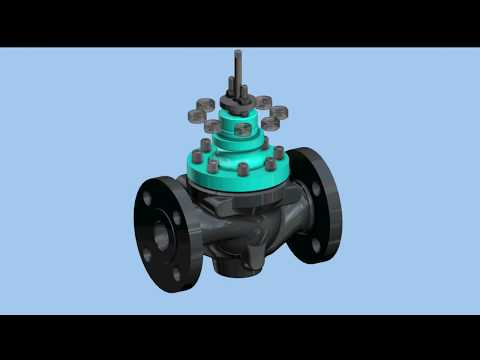

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('8hfvHXhLvGY') # globe

## Rotary stem valves

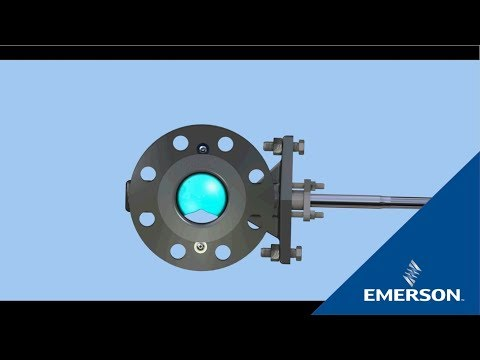

In [2]:
YouTubeVideo('qOvbgVLjoK8') # ball

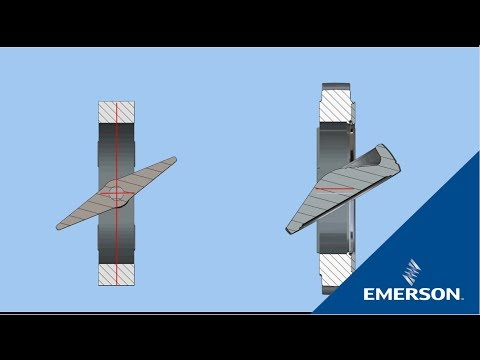

In [3]:
YouTubeVideo('wPr3BCE9BgM') # butterfly

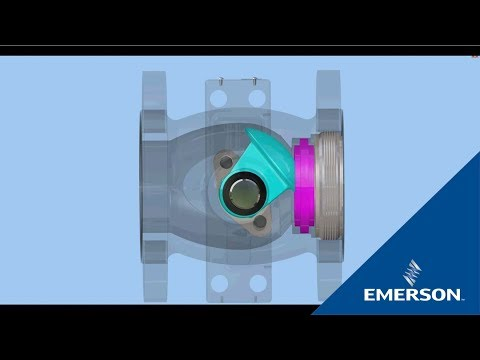

In [4]:
YouTubeVideo('xVrNx-nrZA4') # plug

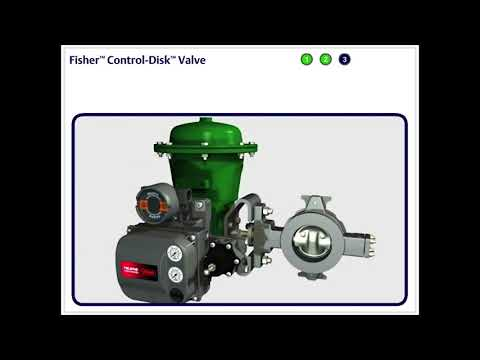

In [8]:
YouTubeVideo('ubTcwCh9I4w') # disk

## Control valve actuators

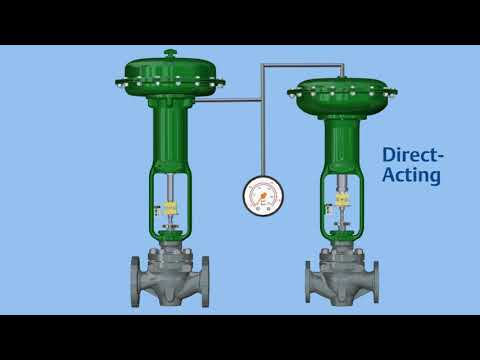

In [5]:
YouTubeVideo('BdmNFyN8tB8') # spring-diaphragm

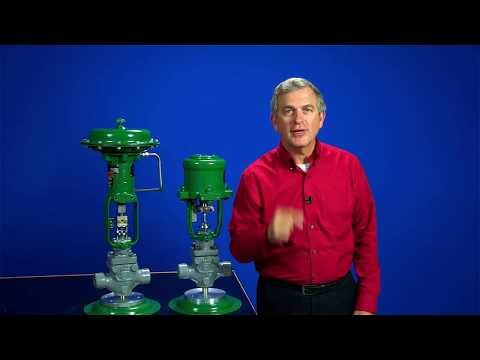

In [6]:
YouTubeVideo('xo8DPGACE-o') # piston

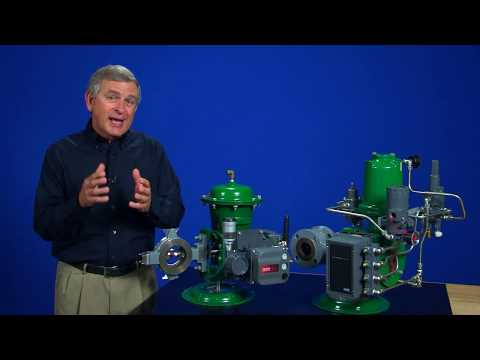

In [7]:
YouTubeVideo('WAI5Lcu_QXE') # rotary actuators

## Control valves

Reading: Tony R. Kuphaldt's [*Lessons in Industrial Instrumentation*: Chapter 27](https://www.ibiblio.org/kuphaldt/socratic/sinst/book/liii_2v32.pdf#page=2110)

Instructions: Click the link above and read this chapter. Chapter 27 describes the main control valve types used as final control elements.

Reading this chapter should take approximately ?? minutes.

Terms of use: This work is licensed under terms of the [CC-BY-4.0 license](http://creativecommons.org/licenses/by/4.0/). It is attributed to Tony R. Kuphaldt.

Supplementary material:
- [Control valve at Wikipedia](https://en.wikipedia.org/wiki/Control_valve)
- [Emerson's Control Valve Handbook](https://www.emerson.com/documents/automation/control-valve-handbook-en-3661206.pdf)

### Incompressible fluids sizing by hand

Reading: ISA's standard [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)*: Chapter 6](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=14).

Instructions: Click the link above and read the chapter. Chapter 6 provides athe relationships between flow rates, flow coefficients, related installation factors, and pertinent service conditions for control valves handling incompressible fluids.

Reading this section should take approximately ?? minutes.

Terms of use: This work is copyrighted by ISA (2007).

### Incompressible fluids sizing using Python

The function [`size_control_valve_l`](https://fluids.readthedocs.io/fluids.control_valve.html#rcbc94063f805-1) from the great Caleb Bell's [`fluids`](https://github.com/CalebBell/fluids) package calculates flow coefficient of a control valve passing a liquid according to ISA-75.01.01-2007.

Let's try to solve [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)* Example 1](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=51).

In this case, for a globe, parabolic plug, flow-to-open valve passing water, we have:

In [ ]:
from fluids.control_valve import size_control_valve_l, Kv_to_Cv

Kv = size_control_valve_l(rho=965.4, Psat=70.1E3, Pc=22120E3, mu=3.1472E-4, P1=680E3, P2=220E3, Q=0.1, 
                          D1=0.15, D2=0.15, d=0.15, FL=0.9, Fd=0.46)

print('Kv = %.0f mˆ3/h' % Kv) # hand calculation gives Kv = 165 mˆ3/h

Kv = 165 mˆ3/h


Now, with [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)* Example 2](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=52) for a ball, segmented ball, flow-to-open valve passing water, we have:

In [ ]:
Kv = size_control_valve_l(rho=965.4, Psat=70.1E3, Pc=22120E3, mu=3.1472E-4, P1=680E3, P2=220E3, Q=0.1, 
                     D1=0.1, D2=0.1, d=0.1, FL=0.6, Fd=0.98)

print('Kv = %.0f mˆ3/h' % Kv) # hand calculation gives Kv = 238 mˆ3/h

Kv = 238 mˆ3/h


To illustrate a more complex case, we borrow an example from [Emerson's Control Valve Handbook](https://www.emerson.com/documents/automation/control-valve-handbook-en-3661206.pdf#page=102). It involves a flow of 800 gpm of liquid propane. The inlet and outlet pipe size is 8 inches, but the size of the valve itself is unknown. The desired pressure drop is 25 psi.

Using the [`scipy`](https://www.scipy.org/) package to converting this problem to SI units and the other great Caleb Bell's [`thermo`](https://github.com/CalebBell/thermo) package to obtain the necessary properties of the fluid, we calculate the necessary Kv of the valve based on an assumed valve size of 3 inches:

In [ ]:
from scipy.constants import *
from thermo.chemical import Chemical

P1 = 300*psi + 14.7*psi # to Pa
P2 = 275*psi + 14.7*psi # to Pa
T = 273.15 + 21 # to K

propane = Chemical('propane', P=(P1+P2)/2, T=T)
rho = propane.rho
Psat = propane.Psat
Pc = propane.Pc
mu = propane.mu

Q = 800*gallon/minute # to m^3/s
D1 = D2 = 8*inch # to m
d = 3*inch # to m

The standard specifies two more parameters specific to a valve:

- FL, Liquid pressure recovery factor of a control valve without attached fittings
- Fd, Valve style modifier

Both of these are factors between 0 and 1. In the borrowed example, they are not considered in the sizing procedure and set to 1. These factors are also a function of the diameter of the valve and are normally tabulated next to the values of Cv or Kv for a valve. Again, using `size_control_valve_l` to solve for the flow coefficient:

In [ ]:
Kv = size_control_valve_l(rho, Psat, Pc, mu, P1, P2, Q, D1, D2, d, FL=1, Fd=1)

print('Cv = %.1f' % Kv_to_Cv(Kv=Kv)) # hand calculation gives Cv = 125.7

Cv = 126.5


As this value exceeds the capacity of the assumed valve, which has a Cv of 121, we will need to try a larger valve size.

In [ ]:
d = 4*inch # to m
Kv = size_control_valve_l(rho, Psat, Pc, mu, P1, P2, Q, D1, D2, d, FL=1, Fd=1)

print('Cv = %.1f' % Kv_to_Cv(Kv=Kv)) # hand calculation gives Cv = 125.7

Cv = 116.2


As the new calculated Cv is well under the larger valve’s maximum rated Cv, which has a value of 203, we can select this larger valve size.

This model requires a vapor pressure and a critical pressure of the fluid as inputs. There is no clarification in the standard about how to handle mixtures, which do not have these values. It is reasonable to calculate vapor pressure as the bubble pressure, and the mixture’s critical pressure through a mole-weighted average.

For actual values of Cv, Fl, Fd, and available diameters, an excellent resource is the [Fisher Catalog #12](http://www.documentation.emersonprocess.com/groups/public/documents/catalog/cat12_s1.pdf).

### Compressible fluids sizing by hand

Reading: ISA's standard [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)*: Chapter 7](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=16).

Instructions: Click the link above and read the chapter. Chapter 7 provides athe relationships between flow rates, flow coefficients, related installation factors, and pertinent service conditions for control valves handling compressible fluids.

Reading this section should take approximately ?? minutes.

Terms of use: This work is copyrighted by ISA (2007).

### Compressible fluids sizing using Python

The function [`size_control_valve_g`](https://fluids.readthedocs.io/fluids.control_valve.html#rcbc94063f805-1) from the great Caleb Bell's [`fluids`](https://github.com/CalebBell/fluids) package calculates flow coefficient of a control valve passing a liquid according to ISA-75.01.01-2007.

From [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)* Example 3](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=55) for non-choked gas flow with attached fittings and a rotary, eccentric plug, flow-to-open control valve passing carbon dioxide, we have:

In [ ]:
from fluids.control_valve import size_control_valve_g

Kv = size_control_valve_g(T=433., MW=44.01, mu=1.4665E-4, gamma=1.30, Z=0.988, P1=680E3, P2=310E3, Q=38/36., 
                          D1=0.08, D2=0.1, d=0.05,FL=0.85, Fd=0.42, xT=0.60)

print('Kv = %.1f mˆ3/h' % Kv) # hand calculation gives Kv = 72.1 m3/h

Kv = 72.6 mˆ3/h


From [*ISA-75.01.01-2007 (IEC 60534-2-1 Mod)* Example 4](http://integrated.cc/cse/ISA_750101_SPBd.pdf#page=60) for a small flow trim sized tapered needle plug valve passing water, we have:

In [ ]:
Kv = size_control_valve_g(T=320., MW=39.95, mu=5.625E-5, gamma=1.67, Z=1.0, P1=2.8E5, P2=1.3E5, Q=0.46/3600., 
                          D1=0.015, D2=0.015, d=0.015, FL=0.98, Fd=0.07, xT=0.8)

print('Kv = %.4f mˆ3/h' % Kv) # hand calculation gives Cv = 0.0184

Kv = 0.0165 mˆ3/h


To illustrate a more complex case, we borrow an example from [Emerson's Control Valve Handbook](https://www.emerson.com/documents/automation/control-valve-handbook-en-3661206.pdf#page=106). It involves a flow of 6 million scfh of natural gas. The inlet and outlet pipe size is 8 inches, but the size of the valve itself is unknown. The desired pressure drop is 150 psi.

Using the [`scipy`](https://www.scipy.org/) package to converting this problem to SI units and the other great Caleb Bell's [`thermo`](https://github.com/CalebBell/thermo) package to obtain the necessary properties of the fluid, we calculate the necessary Kv of the valve based on an assumed valve size of 8 inches:

In [ ]:
P1 = 200*psi + 14.7*psi # to Pa
P2 = 50*psi + 14.7*psi # to Pa
T = 273.15 + 16 # to K

natural_gas = Chemical('natural gas', T=T, P=(P1+P2)/2)
Z = natural_gas.Z
MW = natural_gas.MW
mu = natural_gas.mu
gamma = natural_gas.isentropic_exponent

Q = 6E6*foot**3/hour # to m^3/s
D1 = D2 = d = 8*inch #  8-inch Fisher Design V250

The standard specifies three more parameters specific to a valve:

- FL, Liquid pressure recovery factor of a control valve without attached fittings
- Fd, Valve style modifier
- xT, Pressure difference ratio factor of a valve without fittings at choked flow

All three of these are factors between 0 and 1. In the borrowed example, FL and Fd are not considered in the sizing procedure and set to 1. xT is specified as 0.137 at full opening. These factors are also a function of the diameter of the valve and are normally tabulated next to the values of Cv or Kv for a valve. Again using `size_control_valve_g` to solve for the flow coefficient:

In [ ]:
Kv = size_control_valve_g(T, MW, mu, gamma, Z, P1, P2, Q, D1, D2, d, FL=1, Fd=1, xT=.137)

print('Cv = %.0f' % Kv_to_Cv(Kv=Kv)) # hand calculation gives Cv = 1515

Cv = 1526


As the calculated Cv is well under the 8-inch valve maximum rated Cv, which has a value of 2190, the valve is adequate to provide the desired flow.

The calculated Cv value in the borrowed example is 1515, differing slightly due to the properties used.

The example next goes on to determine the actual opening position the valve should be set at to provide the required flow. Their conclusion is approximately 75% open; we can do better using a numerical solver. The values of opening at different positions are obtained in this example from the [Fisher Catalog #12](http://www.documentation.emersonprocess.com/groups/public/documents/catalog/cat12_s1.pdf#page=325).

Loading the data and creating interpolation functions so FL, Fd, and xT are all smooth functions:

In [ ]:
# loading some libraries
from scipy.interpolate import interp1d
from scipy.optimize import newton

# taking values from the catalog
openings = [20, 30, 40, 50, 60, 70, 80, 90] # in pct
Fds = [0.59, 0.75, 0.85, 0.92, 0.96, 0.98, 0.99, 0.99]
Fls = [0.9, 0.9, 0.9, 0.85, 0.78, 0.68, 0.57, 0.45]
xTs = [0.92, 0.81, 0.85, 0.63, 0.58, 0.48, 0.29, 0.14]
Kvs = [24.1, 79.4, 153, 266, 413, 623, 1060, 1890]

# creating the smooth interpolation functions to each coefficient
Fd_interp = interp1d(openings, Fds, kind='cubic')
Fl_interp = interp1d(openings, Fls, kind='cubic')
xT_interp = interp1d(openings, xTs, kind='cubic')
Kv_interp = interp1d(openings, Kvs, kind='cubic')

Creating and solving the objective function:

In [ ]:
# creating the objective function
def to_solve(opening):
    Fd = float(Fd_interp(opening))
    Fl = float(Fl_interp(opening))
    xT = float(xT_interp(opening))
    Kv_lookup = float(Kv_interp(opening))
    Kv_calc = size_control_valve_g(T, MW, mu, gamma, Z, P1, P2, Q, D1, D2, d, FL=Fl, Fd=Fd, xT=xT)
    return Kv_calc - Kv_lookup

# solving with Newton's method
Xv = newton(to_solve, 60) # initial guess of 60 pct

print('Xv = %.0f pct' % Xv) # hand calculation gives Xv = 75 pct

Xv = 74 pct


The hand calculated Xv value in the borrowed example is 75 pct, which agrees very well with our result.

## Safety valves

Reading: Tony R. Kuphaldt's [*Lessons in Industrial Instrumentation*: Section 32.5](https://www.ibiblio.org/kuphaldt/socratic/sinst/book/liii_2v32.pdf#page=2687)

Instructions: Click the link above and read this section. Section 32.5 provides a glance about overpressure safety devices including safety valves.

Reading this section should take approximately ?? minutes.

Terms of use: This work is licensed under terms of the [CC-BY-4.0 license](http://creativecommons.org/licenses/by/4.0/). It is attributed to Tony R. Kuphaldt.

## Exercises

Try to solve the related problems listed [here](https://doc.lagout.org/electronics/Fundamentals%20of%20Industrial%20Instrumentation%20and%20Process%20Control%20%5Bby%20William%20Dunn%5D.pdf) on page 198.

<!--NAVIGATION-->
< [Flow measurement](http://nbviewer.jupyter.org/github/gmxavier/FAT0413156/blob/master/notebooks/06.00-Flow.ipynb) | [Contents](toc.ipynb) | [Analytical measurement](http://nbviewer.jupyter.org/github/gmxavier/FAT0413156/blob/master/notebooks/08.00-Analytical.ipynb) ><p><a href="https://colab.research.google.com/github/gmxavier/FAT0413156/blob/master/notebooks/07.00-Control-Safety-Valves.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/gmxavier/FAT0413156/master/notebooks/07.00-Control-Safety-Valves.ipynb" target="_parent"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>